<a href="https://colab.research.google.com/github/cost1kkk/FIA/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt


***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 2:** *Searching Algorithms* \\
> **Performed by:** *Baxanean Constantin , group *FAF-213* \\
> **Verified by:** Elena Graur, asist. univ.

## Task
## *Being at the peak of advancement and technology, it is no wonder Luna-City is using robots in order to deliver packages. Solve the problem of these robotic couriers getting stuck in underground tunnels. Use A* and another algorithm of your choice to create a strategy for them to move efficiently and fairly in a labyrinth and find the shortest path through it. To test your system, generate the mazes randomly, by yourself (they need to be solvable)*

First of all as a second algorithm i choose Djikstra for an alternative approach to show the eficiency of A* algorithm.

A* (A-star) – A well-known heuristic-based search algorithm that balances speed and accuracy using the formula:

f(n)=g(n)+h(n)

where:

g(n) is the cost to reach node n.

h(n) is the estimated cost from n to the goal.

For example:
<img src="https://github.com/cost1kkk/FIA/blob/main/img1.png?raw=true,width=100" alt= "MyImage" width=700>

And the solution :
<img src="https://github.com/cost1kkk/FIA/blob/main/2.png?raw=true,width=100" alt= "MyImage" width=700>



 Dijkstra's algorithm finds the shortest path from a given source node to every other node. It can be used to find the shortest path to a specific destination node, by terminating the algorithm after determining the shortest path to the destination node.
  
  What's different:

***A****
  
  Uses a heuristic (Manhattan distance).

  Faster because it explores fewer nodes.

***Dijkstra:***

Searches blindly until it finds the goal.

Guarantees the shortest path.


A* Path Length: 5, Steps Taken: 8
Dijkstra Path Length: 5, Steps Taken: 14


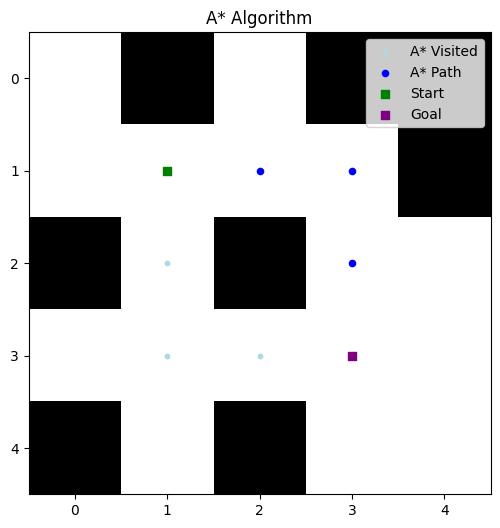

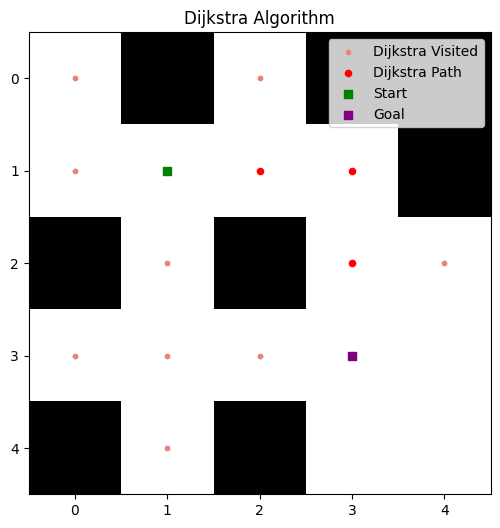

In [4]:
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt

# Directions: Right, Left, Down, Up
DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def generate_solvable_maze(size):
    """Generates a solvable maze using Prim's algorithm."""
    maze = np.ones((size, size), dtype=int)  # 1 = Wall, 0 = Path
    start = (1, 1)
    maze[start] = 0

    walls = [(start[0] + dx, start[1] + dy) for dx, dy in DIRECTIONS if 0 <= start[0] + dx < size and 0 <= start[1] + dy < size]
    random.shuffle(walls)

    while walls:
        x, y = walls.pop()
        if maze[x, y] == 1:
            neighbors = [(x + dx, y + dy) for dx, dy in DIRECTIONS if 0 <= x + dx < size and 0 <= y + dy < size and maze[x + dx, y + dy] == 0]
            if len(neighbors) == 1:
                maze[x, y] = 0
                walls.extend([(x + dx, y + dy) for dx, dy in DIRECTIONS if 0 <= x + dx < size and 0 <= y + dy < size and maze[x + dx, y + dy] == 1])
                random.shuffle(walls)

    # Ensure start and goal are open
    maze[1, 1] = 0
    maze[size-2, size-2] = 0
    return maze

def heuristic(a, b):
    """Manhattan distance heuristic for A*."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    """A* pathfinding algorithm with step-by-step visualization."""
    rows, cols = maze.shape
    open_set = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    visited = set()

    while open_set:
        _, current = heapq.heappop(open_set)
        visited.add(current)
        if current == goal:
            return reconstruct_path(came_from, current), visited

        for dx, dy in DIRECTIONS:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor] == 0:
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None, visited

def dijkstra(maze, start, goal):
    """Dijkstra’s shortest path algorithm with visualization."""
    rows, cols = maze.shape
    pq = [(0, start)]
    came_from = {}
    cost = {start: 0}
    visited = set()

    while pq:
        current_cost, current = heapq.heappop(pq)
        visited.add(current)
        if current == goal:
            return reconstruct_path(came_from, current), visited

        for dx, dy in DIRECTIONS:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor] == 0:
                new_cost = current_cost + 1
                if neighbor not in cost or new_cost < cost[neighbor]:
                    came_from[neighbor] = current
                    cost[neighbor] = new_cost
                    heapq.heappush(pq, (new_cost, neighbor))
    return None, visited

def reconstruct_path(came_from, current):
    """Reconstructs path from start to goal."""
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)  # Include start node
    return path[::-1]

def visualize_algorithm(maze, path, visited, algorithm_name, color_path, color_visited):
    """Visualizes a single algorithm's path computation."""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(maze, cmap="gray_r")

    # Show visited nodes
    ax.scatter([y for x, y in visited], [x for x, y in visited], c=color_visited, s=10, label=f"{algorithm_name} Visited")

    # Show computed paths
    if path:
        ax.scatter([y for x, y in path], [x for x, y in path], c=color_path, label=f"{algorithm_name} Path", s=20)

    # Start and Goal
    ax.scatter(1, 1, c="green", marker="s", label="Start")
    ax.scatter(len(maze)-2, len(maze)-2, c="purple", marker="s", label="Goal")

    ax.legend()
    ax.set_title(f"{algorithm_name} Algorithm")
    plt.show()

# Simulation
size = 5  # Size of the maze
maze = generate_solvable_maze(size)
start, goal = (1, 1), (size-2, size-2)

path_a_star, visited_a_star = a_star(maze, start, goal)
path_dijkstra, visited_dijkstra = dijkstra(maze, start, goal)

# Print path lengths and steps taken
print(f"A* Path Length: {len(path_a_star) if path_a_star else 'No path found'}, Steps Taken: {len(visited_a_star)}")
print(f"Dijkstra Path Length: {len(path_dijkstra) if path_dijkstra else 'No path found'}, Steps Taken: {len(visited_dijkstra)}")

# Separate Visualizations
visualize_algorithm(maze, path_a_star, visited_a_star, "A*", "blue", "lightblue")
visualize_algorithm(maze, path_dijkstra, visited_dijkstra, "Dijkstra", "red", "lightcoral")


## Conclusions:

In this laboratory work i learned the A* algorithm also refreshed my mind with Dijkstra. A* is a usefull algorithm that is much faster than others because it uses a heuristic (Manhattan distance).

## Bibliography:

https://www.wikipedia.org/

https://www.youtube.com/watch?v=lusRf5v-TI0&ab_channel=MaheshHuddar


https://www.youtube.com/watch?v=71CEj4gKDnE&ab_channel=AnishKrishnan

